#Solution 1


In [121]:
#Importing required libraries 
import numpy as np
import math
import matplotlib.pyplot as plt


In [122]:
#Question #1 part A. Composite mid-point 

def mid_point (f,a,b,N):
  h=(b-a)/N 
  wi=h
  result = 0 #initalizing result as 0
  for i in range(N):
    xi=(a+h/2) + h*i
    result += f(xi) * wi
  return result 

In [123]:
#testing of Composite mid-point function.

test_fun = np.sin
start=0
end=np.pi/2
subinterval_num = 1000
mid_point(test_fun,start,end,subinterval_num) 


1.0000001028083867

In [124]:
#Question #1 part A. Composite Trapezoidal 
def Trapezoidal(f,a,b,N):

  h=(b-a)/N
  x= np.linspace(a,b,N+1) # calculating the values for N+1 subintervals.
  y=f(x)
  
  y_left = y[: -1] #defining left endpoints
  y_right= y[1:] #defining right endpoints

  trap=(h/2)*np.sum(y_left+y_right)

  return trap



In [125]:
#testing of Composite Trapezoidal function.

test_fun = np.sin
start=0
end=np.pi/2
subinterval_num = 1000
Trapezoidal(test_fun,start,end,subinterval_num) 


0.9999997943832332

In [126]:
#Question #1 part A. Composite simpsons rule

def simpsons(f,a,b,N):
  if N % 2 == 1:
      raise ValueError("Error! N should be an even integer.")
  h = (b-a)/N
  x = np.linspace(a,b,N+1)
  y = f(x)
  sim = (h/3) * (np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2]))
  return sim

In [127]:
#testing of Composite simpsons rule

test_fun = np.sin
start=0
end=np.pi/2
subinterval_num = 1000
simpsons(test_fun,start,end,subinterval_num) 

1.0000000000000338

In [128]:
#Question #1 part B. Error checking for the above defined functions.

def error_calculation(f,method,a,b,N):
  return abs(1-method(f,a,b,N))

def get_convergence_rate(f,method,a,b,num_of_sub):
    err_h = error_calculation(f, method, a, b, num_of_sub)
    err_h2 = error_calculation(f, method, a, b, 2*num_of_sub)
    r = np.log2(err_h / err_h2)

    return r

Convergance Rates
2 	 2.01964579588489 	 2.0112584676114675 	 4.082367050511894
4 	 2.0048778650512484 	 2.0027893432547197 	 4.020040429724964
8 	 2.001217387841036 	 2.00069577426828 	 4.004977022233514
16 	 2.000304217378344 	 2.0001738462495777 	 4.001242210701075
32 	 2.000076046240955 	 2.0000434554835667 	 4.000310656096933
64 	 2.000019011102546 	 2.0000108634863327 	 4.000078017102563
128 	 2.0000047523457476 	 2.000002715831718 	 4.000048305982787






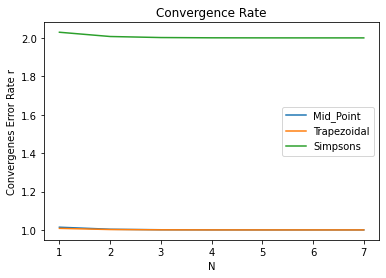

In [129]:
f = np.sin
a = 0
b = np.pi/2

check_val = [2**i for i in range(1, 8)]

# calculating the convergence rate
midpoint_convergence_rate = [get_convergence_rate(f, mid_point, a, b, N) for N in check_val]
trapezoid_convergence_rate = [get_convergence_rate(f, Trapezoidal, a, b, N) for N in check_val]
simpsons_convergence_rate = [get_convergence_rate(f, simpsons, a, b, N) for N in check_val]

print("Convergance Rates")

#printing the convergences rate
for idx,value in enumerate(check_val):
  print(value,'\t',midpoint_convergence_rate[idx],'\t',trapezoid_convergence_rate[idx],'\t',simpsons_convergence_rate[idx])

print('\n')
print('\n')

# for plotting the graph
x=np.log2(check_val) 
y1=np.log2(midpoint_convergence_rate)
y2=np.log2(trapezoid_convergence_rate)
y3=np.log2(simpsons_convergence_rate)


plt.plot(x,y1,label='Mid_Point')
plt.plot(x,y2,label='Trapezoidal')
plt.plot(x,y3,label='Simpsons')

plt.ylabel('Convergenes Error Rate r')
plt.xlabel('N')
plt.title('Convergence Rate')
plt.legend(loc="right")

plt.show()

Error Rate
2 	 0.02617215 	 0.05194055 	 0.00227988
4 	 0.00645454 	 0.0128842 	 0.00013458
8 	 0.00160819 	 0.00321483 	 8.3e-06
16 	 0.00040171 	 0.00080332 	 5.2e-07
32 	 0.00010041 	 0.00020081 	 3e-08
64 	 2.51e-05 	 5.02e-05 	 0.0
128 	 6.27e-06 	 1.255e-05 	 0.0






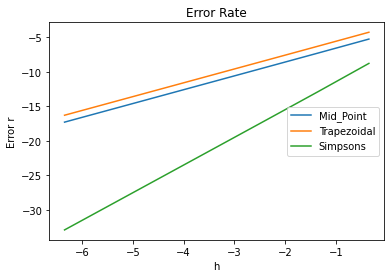

Slopes
2 	 2.01964579588489 	 2.0112584676114684 	 4.082367050511895
4 	 2.0048778650512493 	 2.00278934325472 	 4.020040429724964
8 	 2.001217387841036 	 2.00069577426828 	 4.004977022233515
16 	 2.0003042173783445 	 2.0001738462495773 	 4.001242210701076
32 	 2.000076046240954 	 2.000043455483567 	 4.000310656096932
64 	 2.000019011102548 	 2.000010863486331 	 4.000078017102563


In [130]:
f = np.sin
a = 0
b = np.pi/2

check_val = [2**i for i in range(1, 8)]

h_values = [(b - a) / N for N in check_val]


# calculating the Error rate
midpoint_error_rate = [error_calculation(f, mid_point, a, b, N) for N in check_val]
trapezoid_error_rate = [error_calculation(f, Trapezoidal, a, b, N) for N in check_val]
simpsons_error_rate = [error_calculation(f, simpsons, a, b, N) for N in check_val]

print("Error Rate")

#printing the convergences rate
for idx,value in enumerate(check_val):
  print(value,'\t',round(midpoint_error_rate[idx],8),'\t',round(trapezoid_error_rate[idx],8),'\t',round(simpsons_error_rate[idx],8))

print('\n')
print('\n')

# for plotting the graph
x=np.log2(h_values) 
y1=np.log2(midpoint_error_rate)
y2=np.log2(trapezoid_error_rate)
y3=np.log2(simpsons_error_rate)


plt.plot(x,y1,label='Mid_Point')
plt.plot(x,y2,label='Trapezoidal')
plt.plot(x,y3,label='Simpsons')

plt.ylabel('Error r')
plt.xlabel('h')
plt.title('Error Rate')
plt.legend(loc="right")

plt.show()

# calculating the slope

m1=np.diff(y1)/np.diff(x)
m2=np.diff(y2)/np.diff(x)
m3=np.diff(y3)/np.diff(x)

print("Slopes")


for idx in range(len(m1)):
  print(check_val[idx],'\t',m1[idx],'\t',m2[idx],'\t',m3[idx])



Convergance Rate
2 	 2.0112584676114675 	 -0.1205746186335999
4 	 2.0027893432547197 	 -0.028357330622290823
8 	 2.00069577426828 	 -0.006986228287188238
16 	 2.0001738462495777 	 -0.0017402350681592338
32 	 2.0000434554835667 	 -0.000434665507783539
64 	 2.0000108634863327 	 -0.00010864182724316234
128 	 2.000002715831718 	 -2.7158922906981344e-05






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log2


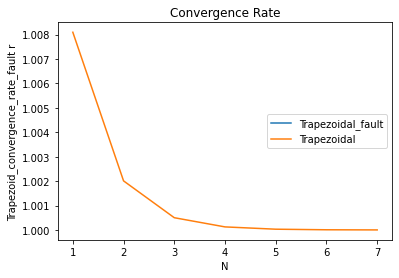

In [131]:
#Question #1 part C. Composite Trapezoidal 
def Trapezoidal_fault(f,a,b,N):

  h=(b-a)/N
  x= np.linspace(a,b,N+1) # calculating the values for N+1 subintervals.
  y=f(x)
  
  y_left = y[: -1] #defining left endpoints
  y_right= y[1:] #defining right endpoints

  trap= h*np.sum(y_left+y_right)

  return trap

f = np.sin
a = 0
b = np.pi/2

check_val = [2**i for i in range(1, 8)]

# calculating the convergence rate
trapezoid_convergence_rate = [get_convergence_rate(f, Trapezoidal, a, b, N) for N in check_val]
trapezoid_convergence_rate_fault = [get_convergence_rate(f, Trapezoidal_fault, a, b, N) for N in check_val]

print("Convergance Rate")

#printing the convergence rate
for idx,value in enumerate(check_val):
  print(value,'\t',trapezoid_convergence_rate[idx],'\t',trapezoid_convergence_rate_fault[idx])

print('\n')
print('\n')

# for plotting the graph
x=np.log2(check_val) 
y=np.log2(trapezoid_convergence_rate_fault)
y1=np.log2(trapezoid_convergence_rate)


plt.plot(x,y,label='Trapezoidal_fault')
plt.plot(x,y1,label='Trapezoidal')

plt.ylabel('Trapezoid_convergence_rate_fault r')
plt.xlabel('N')
plt.title('Convergence Rate')
plt.legend(loc="right")



#Solution 2


In [132]:
# defining Ordinary Diffrential Equation:
def ode(y):
  return y - y**3

# defining exact equation
def exact_solution(yo,t):
  y=y0/(math.sqrt(y0**2 - (y0**2-1) * np.exp(-2 * t)))

  return y


# defining euler's Method
def euler(y0,T,N):
  y=y0
  h=T/N
  for n in range(0,N):
   y=y0+h*ode(y)
  return y

T = 1
y0 = 0.1
N = 100

euler_result = euler(y0, T, N)

In [133]:
#defining Simple Iteration
def iteration(p,x0,precision):
  x=x0
  while abs((p(x)-x)) > precision: 
    x = p(x)
  return x

In [134]:
# defining backward euler's Method
def back_euler(y0,T,N,precision):
  y=y0
  h=T/N
  for n in range(0, N):
    y = iteration(lambda x: y + h * ode(x), y, precision)
    
  return y

In [135]:
# backward euler's Method result

T = 1
y0 = 0.1
N = 100
precision = 0.01

back_euler_result = back_euler(y0, T, N, precision)

In [136]:
# defining crank_nicolson's Method

def crank_nicolson(y0, T, N, precision):
  y=y0
  h = T/N

  for n in range(0, N):
      y = iteration(lambda x: y + 1/2*h*ode(y) + 1/2 * h*ode(x), y, precision)

  return y

In [137]:
# crank_nicolson Method's result

T = 1
y0 = 0.1
N = 100
precision = 0.01

crank_nicolson_result = crank_nicolson(y0, T, N, precision)

In [138]:
# Exact Solution

T = 1
y0 = 0.1
N = 100

exact_sol = exact_solution(y0, T)

In [139]:
# displaying result result

print('Euler: ',euler_result)
print('Backward Euler: ', back_euler_result)
print('Crank Nicolson: ', crank_nicolson_result)
print('Exact Solution: ', exact_sol)

Euler:  0.10099969402387636
Backward Euler:  0.1
Crank Nicolson:  0.1
Exact Solution:  0.2635396737805913


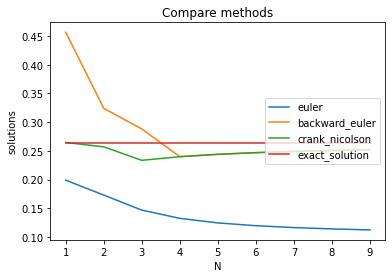

In [140]:
T = 1
y0 = 0.1
check_value = [i for i in range(1, 10)]

euler_values= [euler(y0, T, N) for N in check_value]
back_euler_values=[back_euler(y0, T, N, precision) for N in check_value]
crank_nicolson_values=[crank_nicolson(y0, T, N, precision) for N in check_value]
exact_sol_values=[exact_solution(y0, T) for N in check_value]

# plotting graphs to compare the values
plt.plot(check_value,euler_values, label = "euler")
plt.plot(check_value, back_euler_values, label = "backward_euler")
plt.plot(check_value, crank_nicolson_values, label = "crank_nicolson")
plt.plot(check_value, exact_sol_values, label = "exact_solution")
plt.xlabel('N')
plt.ylabel('solutions')
plt.title('Compare methods')
plt.legend(loc="right")

plt.show()
